In [1]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [2]:
print(housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

# Analise Exploratoria

- Formatação de dados e verificações simples de "sanidade"

In [3]:
housing['data'].shape

(20640, 8)

In [4]:
len(housing['feature_names'])

8

In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame(data=housing['data'], columns=housing['feature_names'])

In [7]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


## Detectar outliers, anomalias, entender melhor a natureza de cada feature (faixa de valores, distribuição, etc)

## MedInc: median income in block group

In [10]:
df['MedInc'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: MedInc, dtype: float64

A mesma informação acima é melhor visualizada com um *boxplot*:

<AxesSubplot:>

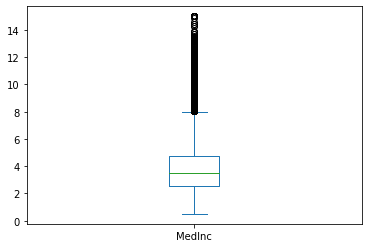

In [11]:
df['MedInc'].plot.box()

Sempre que eu vejo tanto outlier, penso em:

- Fazer um histograma

- Provavelmente vai valer a pena usar o *log* dos dados

In [12]:
import numpy as np

In [13]:
np.sqrt(len(df['MedInc']))

143.66627996854376

<AxesSubplot:ylabel='Frequency'>

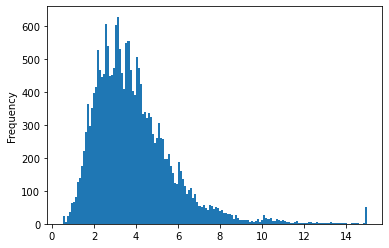

In [14]:
df['MedInc'].plot.hist(bins=150)

Observamos:
    
- Assimetria a direita => Tentar de novo com o *log*

- Uma anomaliazinha no final do histograma, provavelmente devida à saturação => cortar os dados

<AxesSubplot:ylabel='Frequency'>

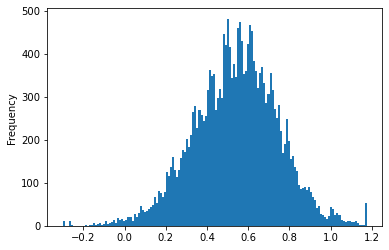

In [15]:
df['MedInc'].apply(np.log10).plot.hist(bins=150)

Se eu cortar em 15, quanto perco de dados?

In [16]:
df['MedInc'].where(lambda x: x >= 15).dropna().count()

51

In [17]:
df[df['MedInc'] >= 15].loc[:, 'MedInc'].count()

51

Ok, posso cortar sem perder muito.

Conclusão:

- Vale a pena testar os modelos com log do MedInc

- Melhor cortar os dados em < 15

## HouseAge 

In [18]:
df['HouseAge'].describe()

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: HouseAge, dtype: float64

A mesma informação acima é melhor visualizada com um *boxplot*:

<AxesSubplot:>

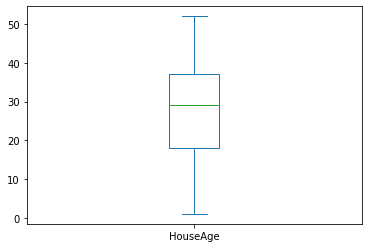

In [19]:
df['HouseAge'].plot.box()

<AxesSubplot:ylabel='Frequency'>

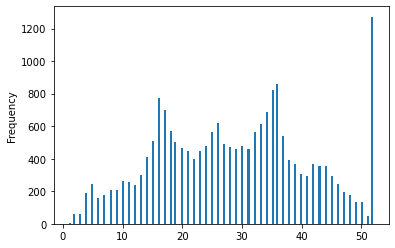

In [20]:
df['HouseAge'].plot.hist(bins=150)

Observamos uma anomalia no extremo do histograma, provavelmente vamos ter que limitar os dados.

In [21]:
df[df['HouseAge'] >= 52].loc[:, 'HouseAge'].count()

1273

Apesar de ser um volume representativo de dados, vamos remove-los por não ter uma boa forma de lidar com dados com limitador.

Conclusão:

- Limitar os dados por 'HouseAge' < 52

## AveRooms

In [22]:
df['AveRooms'].describe()

count    20640.000000
mean         5.429000
std          2.474173
min          0.846154
25%          4.440716
50%          5.229129
75%          6.052381
max        141.909091
Name: AveRooms, dtype: float64

<AxesSubplot:>

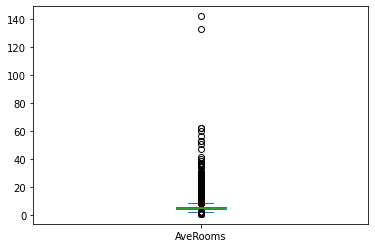

In [23]:
df['AveRooms'].plot.box()

Outliers extremos! Requer análise mais profunda

<AxesSubplot:ylabel='Frequency'>

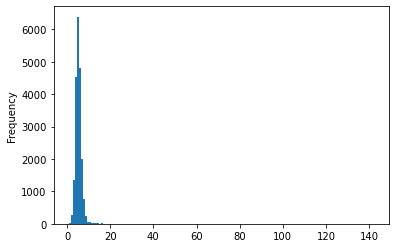

In [24]:
ave_rooms = df['AveRooms']

ave_rooms.plot.hist(bins=150)

<AxesSubplot:ylabel='Frequency'>

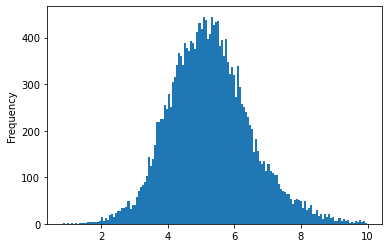

In [25]:
ave_rooms[ave_rooms < 10].plot.hist(bins=150)

Parece que existem dois comportamentos distintos: um comportamento mais "normal" abaixo de AveRooms < 10, e um comportamento anomalo acima de 10, vamos investigar:

In [26]:
df[df['AveRooms'] > 10].shape

(226, 8)

São poucos anômalos, vale a pena eliminar. Mas vamos continuar investigando para entender melhor:

In [27]:
df[df['AveRooms'] > 10].sort_values(by='AveRooms', ascending=False)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1914,1.8750,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10
1979,4.6250,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08
12447,1.6154,17.0,62.422222,14.111111,83.0,1.844444,33.97,-114.49
1913,4.0714,19.0,61.812500,11.000000,112.0,2.333333,39.01,-120.06
11862,2.6250,25.0,59.875000,15.312500,28.0,1.750000,40.27,-121.25
...,...,...,...,...,...,...,...,...
3313,3.4187,17.0,10.053140,2.335749,889.0,2.147343,39.01,-122.75
13937,2.8750,34.0,10.046322,2.059946,941.0,2.564033,34.24,-117.27
12011,6.1561,12.0,10.043860,1.399123,728.0,3.192982,33.92,-117.53
12337,3.6875,17.0,10.033708,1.930337,853.0,1.916854,33.84,-116.52


Explorando as localizações associadas a estes pontos no Google Maps, descobrimos que tratam-se de resorts, confirmando o aviso dado nas informações do dataset!

Conclusão: vamos cortar

## AveBedrms

In [28]:
df['AveBedrms'].describe()

count    20640.000000
mean         1.096675
std          0.473911
min          0.333333
25%          1.006079
50%          1.048780
75%          1.099526
max         34.066667
Name: AveBedrms, dtype: float64

<AxesSubplot:>

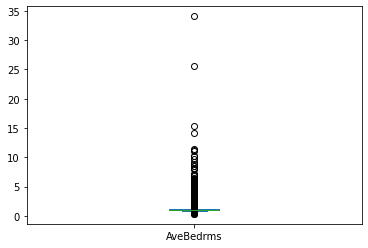

In [29]:
df['AveBedrms'].plot.box()

Novamente temos uma forte anomalia, como vista para AveRooms.

<AxesSubplot:ylabel='Frequency'>

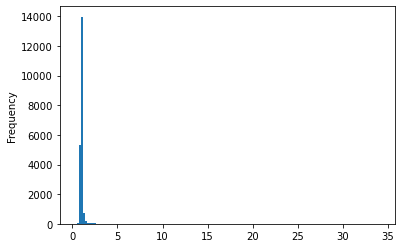

In [30]:
df['AveBedrms'].plot.hist(bins=150)

<AxesSubplot:ylabel='Frequency'>

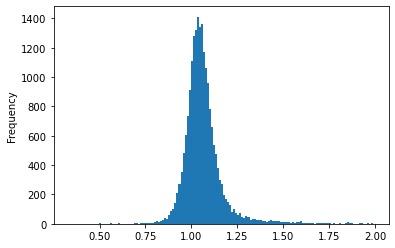

In [31]:
df[df['AveBedrms'] < 2].loc[:, 'AveBedrms'].plot.hist(bins=150)

In [32]:
df[df['AveBedrms'] >= 2].shape

(241, 8)

São poucos pontos, melhor cortar, mas antes de cortar é melhor analisar.

In [33]:
df[df['AveBedrms'] >= 2].sort_values(by='AveBedrms', ascending=False)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1979,4.6250,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08
1914,1.8750,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10
11862,2.6250,25.0,59.875000,15.312500,28.0,1.750000,40.27,-121.25
12447,1.6154,17.0,62.422222,14.111111,83.0,1.844444,33.97,-114.49
9676,3.2431,14.0,52.848214,11.410714,265.0,2.366071,37.64,-119.02
...,...,...,...,...,...,...,...,...
9677,4.5375,18.0,8.629808,2.000000,483.0,2.322115,37.65,-118.98
19616,0.5360,33.0,4.928571,2.000000,47.0,3.357143,37.44,-121.31
3296,2.1838,27.0,9.055118,2.000000,526.0,2.070866,38.98,-122.68
15587,3.8750,11.0,9.375465,2.000000,616.0,2.289963,33.04,-116.61


Analisando as localizações no Google Maps, descobrimos que trata-se do mesmo fenomeno do AveRooms: resorts e hoteis. 

Conclusão: corta!

## AveOccup

In [34]:
df['AveOccup'].describe()

count    20640.000000
mean         3.070655
std         10.386050
min          0.692308
25%          2.429741
50%          2.818116
75%          3.282261
max       1243.333333
Name: AveOccup, dtype: float64

<AxesSubplot:>

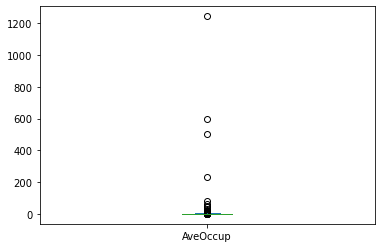

In [35]:
df['AveOccup'].plot.box()

Mesma situação de outliers extremos

<AxesSubplot:ylabel='Frequency'>

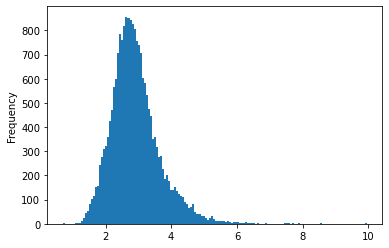

In [36]:
df[df['AveOccup'] < 10].loc[:, 'AveOccup'].plot.hist(bins=150)

<AxesSubplot:ylabel='Frequency'>

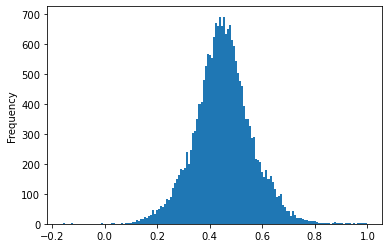

In [37]:
df[df['AveOccup'] < 10].loc[:, 'AveOccup'].apply(np.log10).plot.hist(bins=150)

In [38]:
df[df['AveOccup'] >= 10].shape

(37, 8)

Parece que:
- Vale a pena cortar
- Pode ser que *log* ajude a regressão, mas tem que testar

Vamos explorar os dados a serem cortados, para ver se nada importante vai ser perdido:

In [39]:
df[df['AveOccup'] >= 10].sort_values(by='AveOccup', ascending=False)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51
16669,4.2639,46.0,9.076923,1.307692,6532.0,502.461538,35.32,-120.70
13034,6.1359,52.0,8.275862,1.517241,6675.0,230.172414,38.69,-121.15
9172,4.2391,5.0,5.123810,0.933333,8733.0,83.171429,34.47,-118.59
12104,1.6250,8.0,7.600000,0.950000,1275.0,63.750000,33.97,-117.33
16420,5.7485,26.0,5.366667,0.900000,1542.0,51.400000,37.89,-121.29
8874,9.3370,52.0,7.285714,1.214286,1154.0,41.214286,34.06,-118.45
13366,4.2578,36.0,5.258824,1.117647,2886.0,33.952941,33.94,-117.63
5986,1.8750,52.0,4.500000,1.206349,2688.0,21.333333,34.10,-117.71


Avaliando o Google Maps, vemos que os dados a serem cortados correspondem a prisões.

Conclusão: 
- Corta linhas com 'AveOccup' >= 10
- Pode ser que valha a pena tirar o *log*

## Population

In [40]:
df['Population'].describe()

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: Population, dtype: float64

<AxesSubplot:>

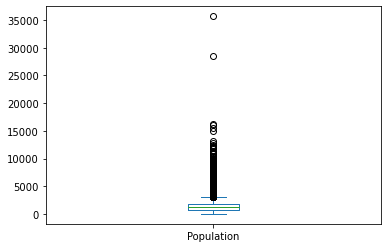

In [41]:
df['Population'].plot.box()

<AxesSubplot:ylabel='Frequency'>

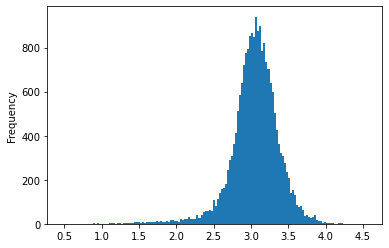

In [42]:
df['Population'].apply(np.log10).plot.hist(bins=150)

Conclusão:

- Com certeza tirar o *log*
- Não tem anomalia, não precisa cortar

## Latitude, Longitude
Voltamos a isso daqui a pouco

## Target

In [43]:
target = housing['target'].copy()

In [44]:
target = pd.Series(data=target, name='MedHouseVal')

In [45]:
target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [46]:
target.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

<AxesSubplot:>

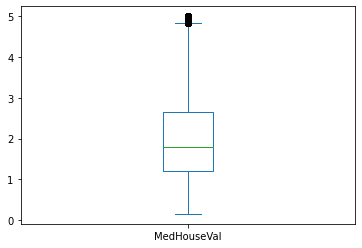

In [47]:
target.plot.box()

<AxesSubplot:ylabel='Frequency'>

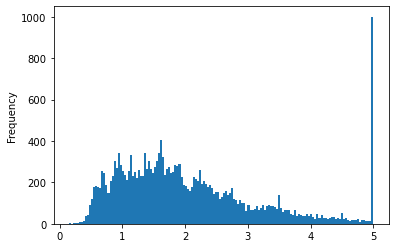

In [48]:
target.plot.hist(bins=150)

<AxesSubplot:ylabel='Frequency'>

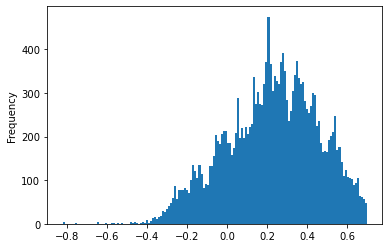

In [49]:
target[target < 5].apply(np.log10).plot.hist(bins=150)

Conclusão:

- Limitar target em target < 5
- aplicar log no target

## Conclusões finais da análise exploratória

Conclusão:

- Limitar MedInc < 15
- Limitar HouseAge < 52
- Limitar AveRooms < 10
- Limitar AveBedrms < 2
- Limitar AveOccup < 10
- Limitar target < 5
- Aplicar *log* no Population, MedInc, AveOccup

# Preprocessamento

In [50]:
idx = (df['MedInc'] < 15) \
    & (df['HouseAge'] < 52) \
    & (df['AveRooms'] < 10) \
    & (df['AveBedrms'] < 2) \
    & (df['AveOccup'] < 10) \
    & (target < 5)

In [51]:
df_filtered = df[idx].copy()
target = target[idx].copy()

In [52]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18269 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      18269 non-null  float64
 1   HouseAge    18269 non-null  float64
 2   AveRooms    18269 non-null  float64
 3   AveBedrms   18269 non-null  float64
 4   Population  18269 non-null  float64
 5   AveOccup    18269 non-null  float64
 6   Latitude    18269 non-null  float64
 7   Longitude   18269 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [53]:
df_filtered['MedInc'] = df_filtered['MedInc'].apply(np.log10)
df_filtered['AveOccup'] = df_filtered['AveOccup'].apply(np.log10)
df_filtered['Population'] = df_filtered['Population'].apply(np.log10)

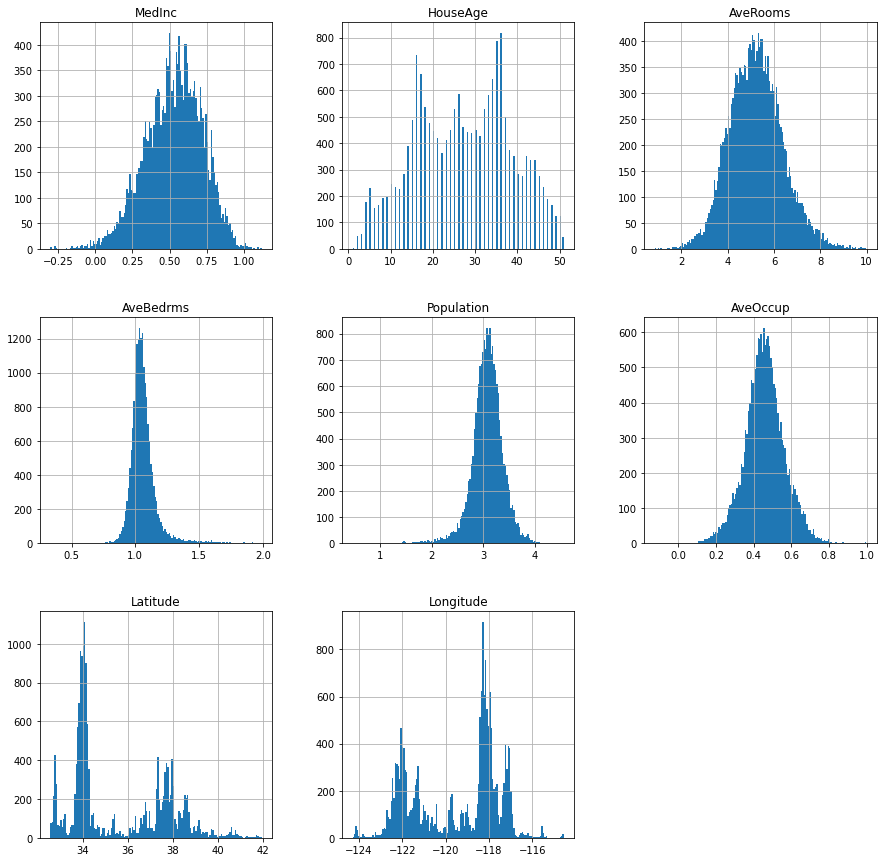

In [54]:
df_filtered.hist(figsize=(15, 15), bins=150);

In [55]:
target = target.apply(np.log10)

<AxesSubplot:ylabel='Frequency'>

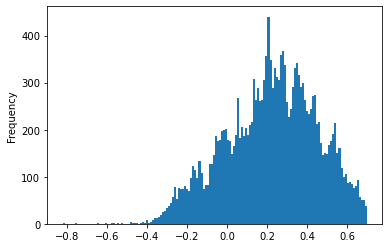

In [56]:
target.plot.hist(bins=150)

# Modelos

## Separação treinamento-validação-teste

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X = df_filtered
X.shape

(18269, 8)

In [59]:
y = target
y.shape

(18269,)

In [60]:
RANDOM_SEED = 42

In [61]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.20, random_state=RANDOM_SEED)

In [62]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.25,
                                                  random_state=RANDOM_SEED)

## Baseline: regressão linear simples

In [63]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_val)

In [64]:
import matplotlib.pyplot as plt

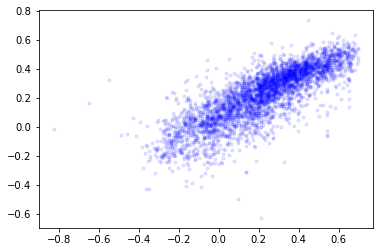

In [65]:
plt.plot(y_val, y_pred, 'b.', alpha=0.1)

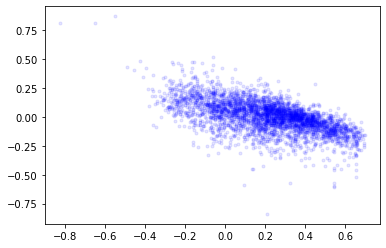

In [66]:
plt.plot(y_val, y_pred - y_val, 'b.', alpha=0.1)

In [67]:
from sklearn.metrics import mean_squared_error

In [68]:
erro_percentual = 100 * (10**np.sqrt(mean_squared_error(y_val, y_pred)) - 1)

In [69]:
print(f'erro = {erro_percentual} %')

erro = 36.2050126390016 %


In [70]:
from sklearn.svm import SVR

model = SVR(gamma=0.01, C=1e3, cache_size=1000)

model.fit(X_train, y_train)
y_pred = model.predict(X_val)

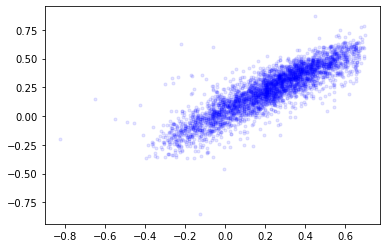

In [71]:
plt.plot(y_val, y_pred, 'b.', alpha=0.1)

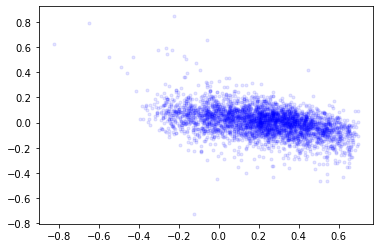

In [72]:
plt.plot(y_val, y_pred - y_val, 'b.', alpha=0.1)

In [73]:
erro_percentual = 100 * (10**np.sqrt(mean_squared_error(y_val, y_pred)) - 1)

In [74]:
print(f'erro = {erro_percentual} %')

erro = 29.034116047904558 %
